# Task 3 Exploratory Data Analysis - Retail

### Author : Sai

## Defining Objective

***Aim: As a business manager, try to find out the weak areas where you can
work to make more profit. What all business problems you can derive by exploring the data?***

# Collecting Data and importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.shape

(9994, 13)

There are total 9994 observations and 13 attributes present in the data.

# Data cleaning

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As it can be noticed, there are no null values present in the data.

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Quantity and Discount can never be negative. Hence, it's necessary to check for these values so that it can be 
removed and replaced. 

In [7]:
for j in df['Quantity']:
    if j<0:
        print("Negative value spotted")
for k in df['Discount']:
    if k<0:
        print("Negtaive value spotted")

As it can be noticed, there are no negative values present in the data. 

Now, we need to check for duplicated values. If they are present, they must be removed.

In [8]:
df.duplicated().sum()

17

There are 17 duplicated values in the data, so we need to remove them. 

In [12]:
df = pd.DataFrame.drop_duplicates(df)
df.duplicated().sum()

0

The column postal code serves no purpose for our analysis as we already know the city and region. It also does not give the 
overall picture of the sales in each city like region. Hence, we should drop it.

In [13]:
df_new = df.drop(['Postal Code'], axis=1)
df_new.head(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [14]:
df_new.shape

(9977, 12)

We have the same number of observations, but now, we have 12 attributes

In [15]:
df_new.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


This shows a summary of the statistics of numerical variables. Now, we need to find the outliers present and remove them. 

In [16]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
min_wh = Q1-(IQR*1.5)
max_wh = Q3+(IQR*1.5)

In [17]:
df_new = df_new[~((df_new < min_wh) |(df_new > max_wh)).any(axis=1)]

In [18]:
df_new.shape

(7127, 12)

As we can see, observations which contained outliers are removed from the data set. We can confirm this by plotting a box plot.

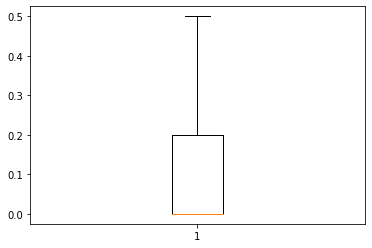

In [19]:
plt.boxplot(df_new['Discount'])
plt.show()

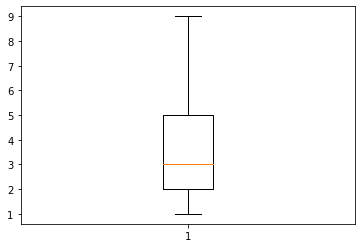

In [20]:
plt.boxplot(df_new['Quantity'])
plt.show()

The data is clean and ready for analysis

# Exploring and Visualising the Data

We will now explore some key aspects in the Data. The following things should be known
1. Which State/City has the highest/lowest profit/sales? Which product is responsible for it?
2. Does having more discount contribute to more profit/sales/quantity?
3. Does type of shipping mode have impact on sales/profit?
4. Does the type of segment influence profit/sales?

Before going to these questions, let's first dig into the data.

## Pie Charts for Category and Sub Category

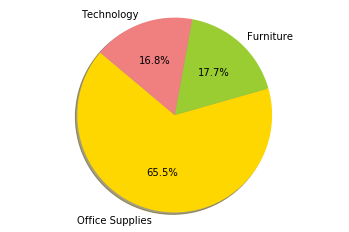

In [22]:
labels = 'Office Supplies', 'Furniture', 'Technology'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(df_new['Category'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

As it can be seen, Office Supplies is the most popular category overall. It has recorded 65.5% of the observations. 
Interestingly, Technology has recorded 0.9% less than Furniture. Since many people work in the Office, this could have 
let Office supplies get more rows in comparsion to other two categories.

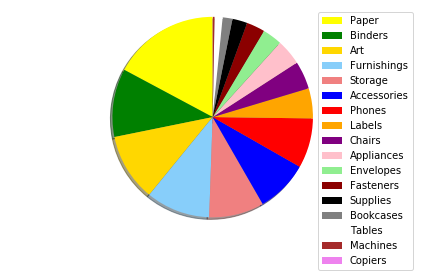

In [23]:
labels = ['Paper', 'Binders', 'Art', 'Furnishings','Storage','Accessories','Phones','Labels','Chairs','Appliances','Envelopes','Fasteners','Supplies','Bookcases','Tables','Machines','Copiers']
colors = ['yellow','green', 'gold', 'lightskyblue', 'lightcoral', 'blue','red','orange','purple','pink','lightgreen','darkred', 'black','grey','white','brown','violet']
plt.pie(df_new['Sub-Category'].value_counts(), colors=colors, shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

As there are mulitple values, it's best not to show percentages. But given the label, we can clearly identify that Paper 
received the highest number of the records in the data. An interesting aspect in this pie chart is Art recorded similar
records to Binders in the data. Copiers recorded the lowest as it's clearly not visible on the pie chart. Therefore,
it is pretty clear that Papers is famous among the items.

## Checking State data

In [24]:
df_new['State'].value_counts()

California              1601
New York                 869
Texas                    565
Washington               399
Pennsylvania             369
Ohio                     305
Florida                  259
Illinois                 248
Michigan                 187
North Carolina           171
Virginia                 167
Arizona                  150
Georgia                  136
Tennessee                135
Colorado                 117
Indiana                  110
Kentucky                 101
Massachusetts            100
New Jersey                98
Oregon                    86
Maryland                  81
Delaware                  74
Wisconsin                 74
Minnesota                 67
Connecticut               62
Missouri                  54
Arkansas                  45
Oklahoma                  45
Alabama                   44
Utah                      42
Rhode Island              39
Mississippi               38
South Carolina            34
Louisiana                 33
Nebraska      

California is clearly the favourite as it has recorded 1601 rows, meaning there could be really high business activity in the state. West Virgina has only 2 records, which is the lowest among the other states. Overall, we could see a higher volume of business activity in California in comparsion to other states as no other state has more than 1000 rows. 

## Checking Profit data

In [25]:
df_new['Profit'].describe()

count    7127.000000
mean       13.008233
std        17.200106
min       -39.637000
25%         3.239200
50%         8.299200
75%        19.627650
max        70.722000
Name: Profit, dtype: float64

The maximum profit ever made is 70.72 dollars while the highest loss incurred is 39.64 dollars. By this, we can notice that each businessis coming close to break even, either little bit up or little bit down. Therefore, there is room for improvement to make much bigger profits. 

## Checking Quantity data

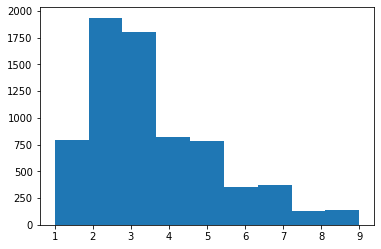

In [36]:
plt.hist(df_new['Quantity'],bins=9)
plt.show()

The histogram clearly shows a right skew as most of the data comes from the left side and it is also unimodal. It shows
that most customers are clearly interested to buy 2 items. On the other hand, segments do not show much interest to buy more
than 7 items. As it can be seen, both quantity number 8 and 9 recorded less than 250 records. However, it has to be noted 
that quantity number taken depends on the product/item the customer/segment is buying.

## Checking Discount data

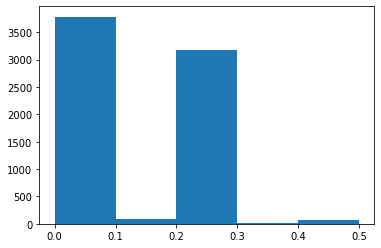

In [37]:
plt.hist(df_new['Discount'],bins=5)
plt.show()

The histogram is bimodal and left skewed(mean<median). The discount price which was most popular was giving no discount at all!
This is defintely surprising as customers normally expect a discount on the item. The next popular discount is 0.20 dollars, which is more than what 0.10 dollars got. This is another interesting aspect of the data as it presents that the company is reducing 0.10 dollars further for customers. The least favourable discount was 0.50 dollars. This could mean the company is not eager to reduce the price of their product more than 0.20 dollars. In short, the business mostly preffered not to give discount or to give discount of 0.20 dollars.

## Pie Chart for Segment and Ship mode

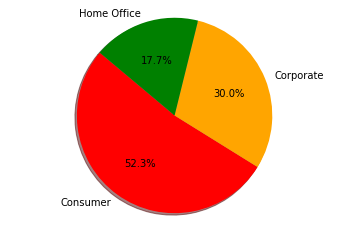

In [28]:
labels = 'Consumer', 'Corporate', 'Home Office'
colors = ['red','orange','green']

plt.pie(df_new['Segment'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

The type of customers who buy the most are clearly consumers, followed by corporates and people who work in Home 
offices. The company selling their goods to these segments should consider the interests mostly of the Consumer to increase
revenue and sales.

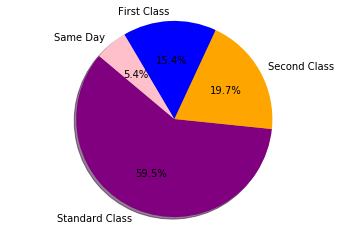

In [29]:
labels = 'Standard Class', 'Second Class','First Class','Same Day'
colors = ['purple', 'orange', 'blue', 'pink']

plt.pie(df_new['Ship Mode'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Products are mostly delivered through Standard class, which demonstrates most segments are not willing to pay extra money for First Class Delivery. The products in the data set are not that fragile, which explains why businesses are going for standard class. 

Now, let's go through each question one by one and get a conclusion

## Q1. Which State and City has the highest/lowest profit/sales? Which product is responsible for it?

In [43]:
cols = [3,4,7,8,11]
df_st = df_new[df_new.columns[cols]]

In [45]:
high_p = max(df_st['Profit'])
print(high_p)
print(df_st.loc[df_st['Profit']==high_p, 'State'])
print(df_st.loc[df_st['Profit']==high_p, 'City'])

70.722
1866    Nevada
Name: State, dtype: object
1866    Henderson
Name: City, dtype: object


Before writing this code, I expected California as it had the highest number of observations, meaning a higher business activity which can contribute to more profits. However, Henderson in Nevada has recorded the highest profit with 70.72 dollars. 

In [32]:
df_st.loc[df_st['Profit']==high_p, 'Sub-Category']

1866    Furnishings
Name: Sub-Category, dtype: object

Furnishings has been chosen as the favourite of customers buying it. Most middle class people do furnishing to make their homes 
look outstanding. The business company can therefore see to increase number of furnishing items in Henderson.

In [48]:
low_p = min(df_st['Profit'])
print(low_p)
print(df_st.loc[df_st['Profit']==low_p, 'State'])
print(df_st.loc[df_st['Profit']==low_p, 'City'])

-39.637
6653    Texas
Name: State, dtype: object
6653    Arlington
Name: City, dtype: object


Arlington, Texas has recorded the highest loss among the other states with 39.64 dollars approximately. This is another surprising aspect as Texas is the third highest state in terms of number of records. This proves that higher records does not guarantee higher profits. 

In [34]:
df_st.loc[df_st['Profit']==low_p, 'Sub-Category']

6653    Chairs
Name: Sub-Category, dtype: object

Chairs has recorded the lowest profit ever in Texas, showing the lack of interest for Texas customers towards Chairs. Therefore, the business company should not invest too much on Chairs for Texas. Instead, they can invest more where Chairs are churning more profit.

In [49]:
max_chair = max(df_st[df_st['Sub-Category']=='Chairs']['Profit'])
print(max_chair)
print(df_st.loc[df_st['Profit']==max_chair, 'State'])
print(df_st.loc[df_st['Profit']==max_chair, 'City'])

68.3332
3376    New York
Name: State, dtype: object
3376    Hempstead
Name: City, dtype: object


As it can be seen, Chairs is the favourite for Hempstead, New York as it makes 68.33 dollars profit. Therefore, the business company selling chairs can increase the activity in this city instead of Arlington, Texas. The solution for Arlington to reduce loss and increase revenue is below. 

In [56]:
max_pro_TX = max(df_st[df_st['City']=='Arlington']['Profit'])
print(df_st.loc[df_st['Profit']==max_pro_TX, 'Sub-Category'])

993     Paper
1500    Paper
6979    Paper
7024    Paper
7673    Paper
7845    Paper
Name: Sub-Category, dtype: object


Instead of investing more into Chairs, Arlington should focus on increasing the sales of papers. It generates both revenue and profit too. 

Now, let's take a look at the sales and find out which state/city has highest or lowest sales.

In [63]:
high_sal = max(df_st['Sales'])
print(high_sal)
print(df_st.loc[df_st['Sales']==high_sal, 'State'])
print(df_st.loc[df_st['Sales']==high_sal, 'Sub-Category'])

496.86
8532    Michigan
Name: State, dtype: object
8532    Storage
Name: Sub-Category, dtype: object


Michigan has the highest number of sales in comparsion to other states. Once again, this is an unexpected result as it ranks 
less than California in terms of business activity. Storage is clearly the favourite for Michigan customers. It has recorded 
highest sales with 496.86 dollars. 

In [65]:
low_sal = min(df_st['Sales'])
print(low_sal)
print(df_st.loc[df_st['Sales']==low_sal, 'State'])
print(df_st.loc[df_st['Sales']==low_sal, 'City'])
print(df_st.loc[df_st['Sales']==high_sal, 'Sub-Category'])

0.99
2761    California
Name: State, dtype: object
2761    San Francisco
Name: City, dtype: object
8532    Storage
Name: Sub-Category, dtype: object


The lowest sales recorded in the data set is San Francisco, California. This is defintely a shocking result, but clearly the company distributing storage equipment here should bear in mind not to spend too much to reduce potential losses. Let's see whether 
they made profit or not.

In [66]:
print(df_st.loc[df_st['Sales']==low_sal, 'Profit'])

2761    0.4356
Name: Profit, dtype: float64


They have made profit, however, it can be much more better. An alternative for the company could be investing into something 
that generates more sales and is able to generate reasonable profits. We can find out what product can do that.

In [68]:
max_sal_CA = max(df_st[df_st['City']=='San Francisco']['Sales'])
print(max_sal_CA)
print(df_st.loc[df_st['Sales']==max_sal_CA, 'Sub-Category'])

451.152
569     Chairs
8120    Chairs
Name: Sub-Category, dtype: object


Chairs is something the business company can invest more into for San Francisco as it will generate more sales and 
guarantee more profits. 

## Q2. Does having more discount contribute to more profit/sales/quantity?

To answer this question, we are going to draw a scatterplot. The X variable is discount while Y variable is Profit

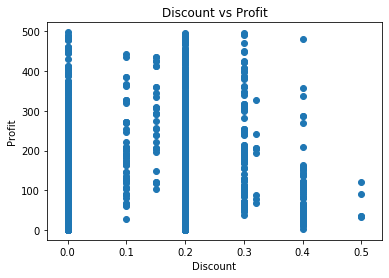

In [70]:
plt.scatter(df_new['Discount'], df_new['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

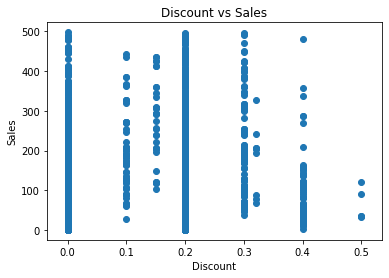

In [71]:
plt.scatter(df_new['Discount'], df_new['Sales'])
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

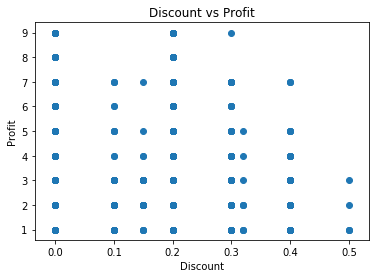

In [72]:
plt.scatter(df_new['Discount'], df_new['Quantity'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Clearly, discount is showing no relation to Profit, Quantity and Number of Sales. All three Scatterplots prove this as neither are linear. This is again an interesting aspect as generally discount has some kind of impact on both profit and sales. Even quantity will be have an effect as reducing a price on item generally sparks interest in customers to buy more. One explanation for this could be that none of the products are groceries/clothes. Even if there is a discount for a phone, the price will still be really high for a common man. Therefore, discount and quantity are not showing any association. 

## Q3. Does type of shipping mode have impact on sales/profit?

We need to draw bar plots to visually check and then analyse it. 

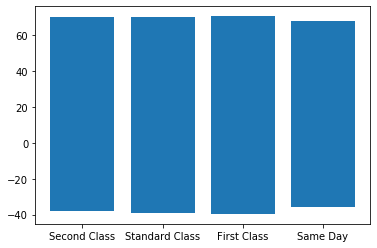

In [85]:
plt.bar(df_new['Ship Mode'], df_new['Profit'])
plt.show()

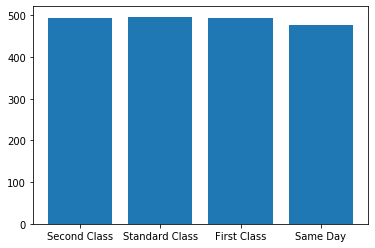

In [86]:
plt.bar(df_new['Ship Mode'], df_new['Sales'])
plt.show()

The bar plots above proves that standard class and second class are the best options for the company. First class delivery does not guarantee higher sales and profits, therefore, the company should invest more into second class and standard class deliveries for the customers. 

## Q4 Does the type of segment/customer influence profit/sales? 

The final question asks which customer contributes more to profits and sales. This is important as the business company can increase more dealings with that segement. We will use a bar plot again. 

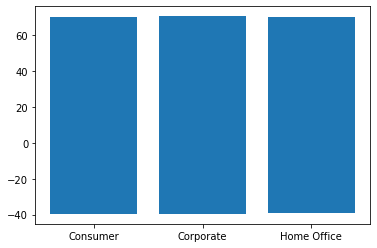

In [87]:
plt.bar(df_new['Segment'], df_new['Profit'])
plt.show()

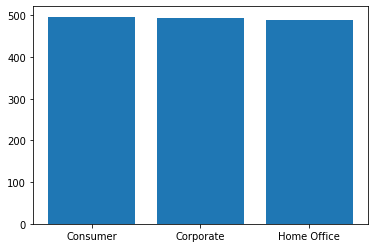

In [88]:
plt.bar(df_new['Segment'], df_new['Sales'])
plt.show()

As it can be seen, all three types of segments generate about the same profit and sales. The business company should therefore continue their process of doing dealings with all three type of customers.

# Conclusion

1. The company should bear in mind that just because a state receives higher number of dealings, it does not mean that there will be bigger profits and sales. This is proven with Question 1. Therefore, each state is crucial and should be given equal importance. 
2. However, that does not mean getting loss by delivering products which have no popularity among customers in certain cities and states. For example, the company should not invest too much on doing dealing with Arlington for chairs. Instead, they can invest on Paper which will guarantee profits in Arlington. Chairs on the other hand have a greater popularity in New York, so the company could make more revenue by doing more chair dealings with Hempsted. 
3. Having a discount on product is not propotional to profit or sales. However, the scatterplot recorded several data points with highest profit when there is no discount. Given all outliers were removed, these results can be trusted. Therefore, the business company can give discount on products, but it should not exceed 0.40 dollars. The inital assumption was 0.20 dollars when the individual discount data was checked. 
4. The business company can further reduce costs by giving more preference to both second class and standard class. These two shipping modes have generated more profit and sales in comparsion to first class delivery. Therefore, if the company wants to increase revenue, they should mostly decrease dealings which demand first class.
5. The type of customer or segment does not impact profit or sales. Hence, the company should show equal importance to each customer if they have a dealing/order. 